In [36]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yfin

from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats

In [37]:
#Collect the daily closing yields for 5 government securities, say over 6 months.
# Starting and end dates
start = datetime.date(2021, 9, 1)
end = datetime.date(2023, 1, 1)

# Get data
df = yfin.download(["^TYX", "^TNX", "^FVX", "2YY=F", "^IRX"], start, end, auto_adjust = False)['Adj Close']

# Display the first five rows
df.head()

[*********************100%***********************]  5 of 5 completed


Ticker,2YY=F,^FVX,^IRX,^TNX,^TYX
Date,,,,,
2021-09-01,0.230,0.780,0.040,1.302,1.919
2021-09-02,0.231,0.776,0.040,1.294,1.907
2021-09-03,0.227,0.785,0.040,1.322,1.943
2021-09-07,0.236,0.819,0.035,1.370,1.984
2021-09-08,0.236,0.806,0.040,1.334,1.953


(0.0, 6.0)

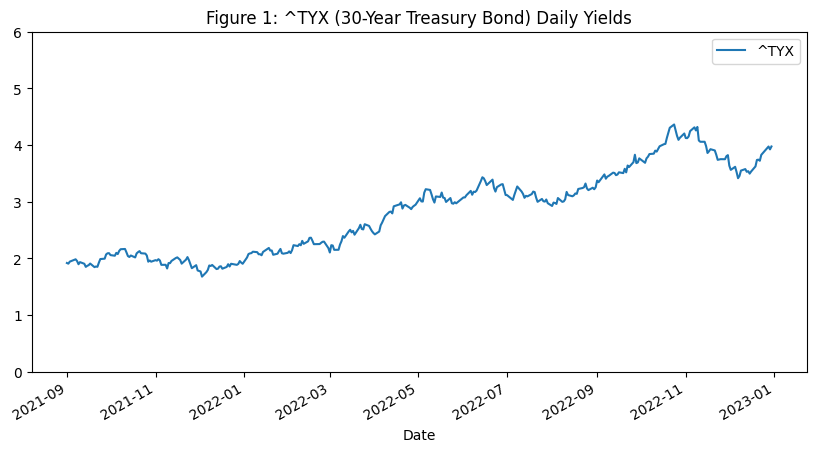

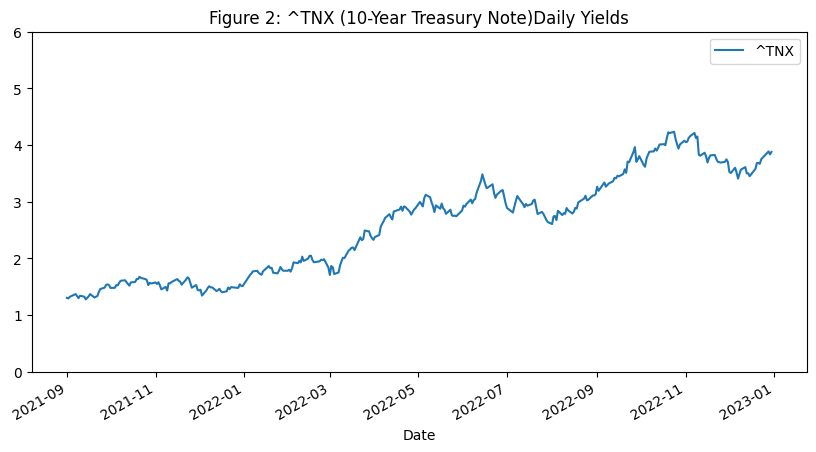

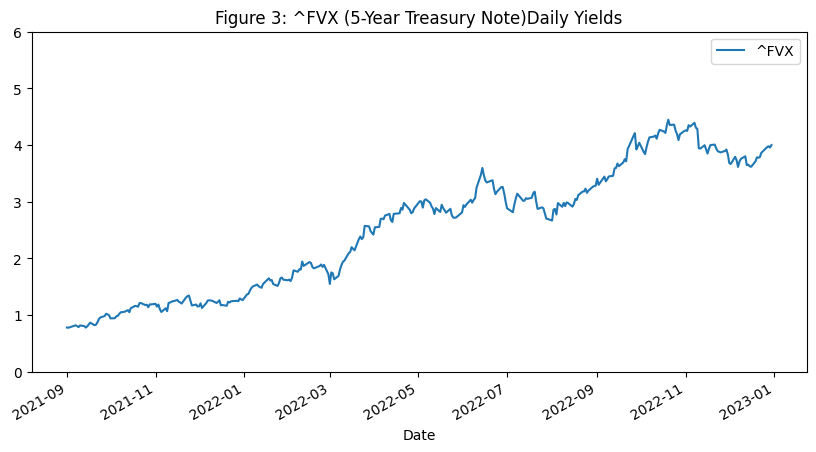

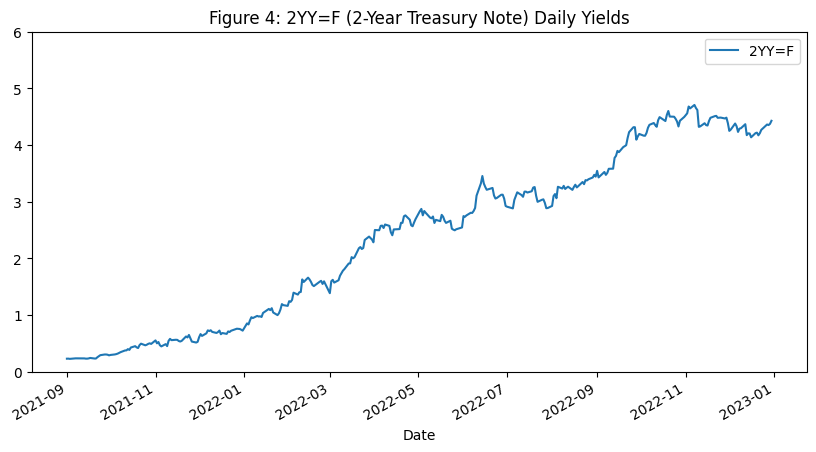

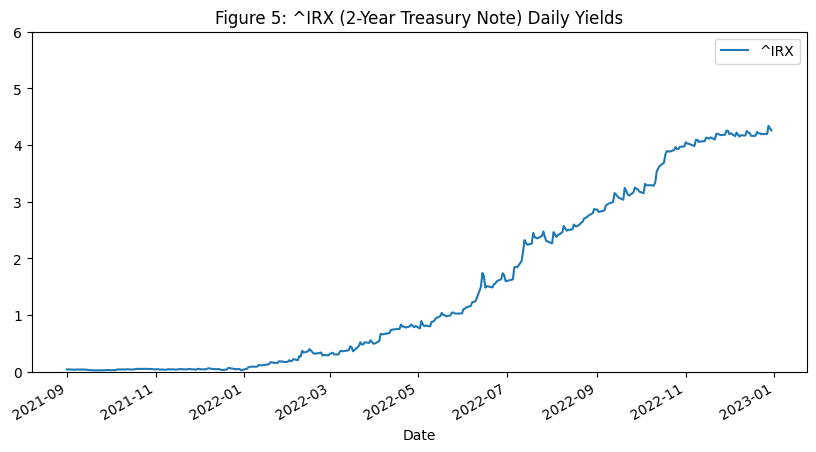

In [38]:
# Generate two plots
ax1 = df.plot(figsize=(10, 5), y="^TYX", title="Figure 1: ^TYX (30-Year Treasury Bond) Daily Yields")
ax2 = df.plot(figsize=(10, 5), y="^TNX", title="Figure 2: ^TNX (10-Year Treasury Note)Daily Yields")
ax3 = df.plot(figsize=(10, 5), y="^FVX", title="Figure 3: ^FVX (5-Year Treasury Note)Daily Yields")
ax4 = df.plot(figsize=(10, 5), y="2YY=F", title="Figure 4: 2YY=F (2-Year Treasury Note) Daily Yields")
ax5 = df.plot(figsize=(10, 5), y="^IRX", title="Figure 5: ^IRX (2-Year Treasury Note) Daily Yields")

# Set y-axis limits for plots
ax1.set_ylim(0.0, 6.0)
ax2.set_ylim(0.0, 6.0)
ax3.set_ylim(0.0, 6.0)
ax4.set_ylim(0.0, 6.0)
ax5.set_ylim(0.0, 6.0)

In [39]:
#correlation
print(round(df.corr(), 5))

Ticker    2YY=F     ^FVX     ^IRX     ^TNX     ^TYX
Ticker                                             
2YY=F   1.00000  0.99381  0.93152  0.98537  0.97604
^FVX    0.99381  1.00000  0.90755  0.99548  0.98333
^IRX    0.93152  0.90755  1.00000  0.91423  0.92921
^TNX    0.98537  0.99548  0.91423  1.00000  0.99382
^TYX    0.97604  0.98333  0.92921  0.99382  1.00000


In [40]:
# covariance matrix
df.cov()

Ticker,2YY=F,^FVX,^IRX,^TNX,^TYX
Ticker,,,,,
2YY=F,2.132132,1.598884,2.074716,1.279486,1.057936
^FVX,1.598884,1.213980,1.525239,0.975366,0.804253
^IRX,2.074716,1.525239,2.326583,1.240070,1.052107
^TNX,1.279486,0.975366,1.240070,0.790787,0.656028
^TYX,1.057936,0.804253,1.052107,0.656028,0.551027


In [41]:
# Perform PCA
pca = PCA()
pca.fit(df)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [42]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

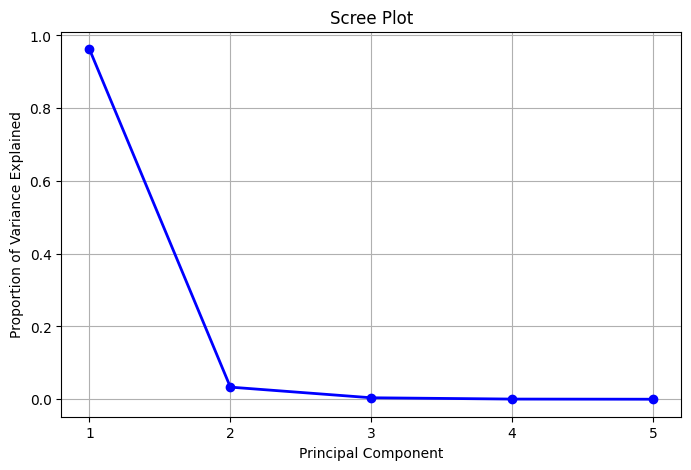

In [43]:
# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', linewidth=2, color='blue')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()